In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import csv

# file_path = r'/Users/ada.wang/Downloads/Project_dataset.csv' # Should we save the raw data in Google Drive?
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [4]:
# Find missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) 


Income    24
dtype: int64


In [5]:
# Drop the rows with missing values
df.dropna(inplace=True)

In [6]:
# Check if there are duplicated values
duplicates = df.duplicated().sum()
print(duplicates)

0


In [7]:
# Marital_Status

# Dropping the rows that has Marital_Status == 'Absurd' OR  'YOLO'
df = df[df['Marital_Status'] != 'Absurd']
df = df[df['Marital_Status'] != 'YOLO']

#Making Sure All Rows where Marital_Status = 'Absurd'  or 'YOLO' are removed
print('No of Absurd = ',df[df['Marital_Status'] == 'Absurd']['Marital_Status'].count())
print('No of YOLO = ',df[df['Marital_Status'] == 'YOLO']['Marital_Status'].count())

# Revise the Marital_status
df['Marital_Status_revised'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Together': 'Married'
    })

df['Marital_Status_revised'].unique()

No of Absurd =  0
No of YOLO =  0


array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In [8]:
# set the revised marital status as the marital status
df['Marital_Status'] = df['Marital_Status_revised']

df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow'], dtype=object)

In [9]:
# Education
# Replace Graduation to Bachelor, and 2n Cycle to Master
df['Education_revised'] = df['Education'].replace({
    'Graduation': 'Bachelor',
    '2n Cycle': 'Master'
})
df['Education_revised'].unique()

array(['Bachelor', 'PhD', 'Master', 'Basic'], dtype=object)

In [10]:
# the original Education variable unique values
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
# reset the Education variable to the revised Education variable
df['Education'] = df['Education_revised']
df['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'Basic'], dtype=object)

In [12]:
# Age
# Add one column as Age
df['Age'] = 2014 - df['Year_Birth']
# Remove people age > 100
df = df[df['Age'] <= 100]


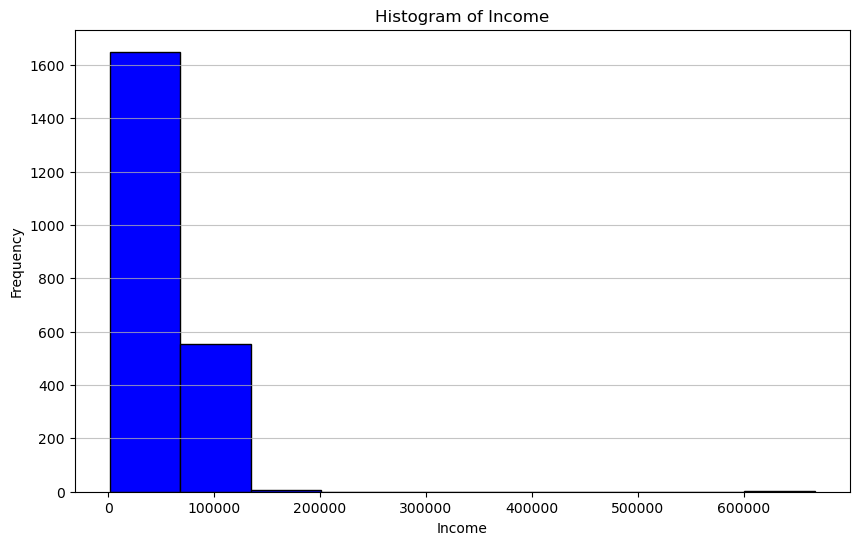

In [13]:
# Plot histogram for 'Income' column
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

We have ***outlier*** in the Income  ***column***, removing people with income higher than 150k.

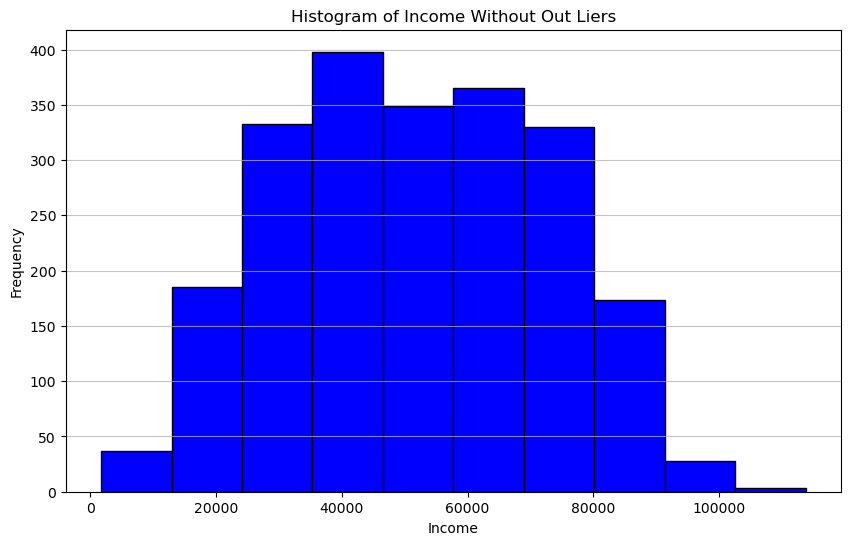

In [14]:
# Displaying the INCOME values that are 150,000   (outliers to remove them)
df[df['Income'] >=150000]['Income'].head(20)

# updating the df dataframe by dropping rows when Income >= 150,000
df = df[df['Income'] <= 150000]

#Making sure there is no Income more than 150,000
df[df['Income'] >= 150000]['Income'].count()

# Plot the new histogram for 'Income' column After Removing Outliers
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Income Without Out Liers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [15]:
# Dropping 2 columns: 'Z_CostContact'   &    'Z_Revenue'
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_revised,Education_revised,Age
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,Single,Bachelor,57
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,0,Single,Bachelor,60
2,4141,1965,Bachelor,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,Married,Bachelor,49
3,6182,1984,Bachelor,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,0,Married,Bachelor,30
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,0,Married,PhD,33


- Creating a 'Since_Years' variable

In [16]:
# Convert 'Dt_Customer' to datetime to calculate how many years has been a customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
#Add a colum called 'Since_Years' to the data frame
df['Since_Years'] = 2024 - df['Dt_Customer'].dt.year
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_revised,Education_revised,Age,Since_Years
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,Single,Bachelor,57,12
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,Single,Bachelor,60,10
2,4141,1965,Bachelor,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,Married,Bachelor,49,11
3,6182,1984,Bachelor,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,Married,Bachelor,30,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,Married,PhD,33,10


In [17]:
# Creating a new column in the df called 'Total Purchases' = 'NumWebPurchases' + 'NumStorePurchases' + 'NumStorePurchases'
df['Total_Number_Purchases'] = df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumCatalogPurchases']
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_revised,Education_revised,Age,Since_Years,Total_Number_Purchases
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,Single,Bachelor,57,12,22
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,Single,Bachelor,60,10,4
2,4141,1965,Bachelor,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,Married,Bachelor,49,11,20
3,6182,1984,Bachelor,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,Married,Bachelor,30,10,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,Married,PhD,33,10,14


In [18]:
# creating total dollar purchased variable
df['Total_Dollar_Purchased'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_revised,Education_revised,Age,Since_Years,Total_Number_Purchases,Total_Dollar_Purchased
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,1,Single,Bachelor,57,12,22,1617
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,Single,Bachelor,60,10,4,27
2,4141,1965,Bachelor,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,Married,Bachelor,49,11,20,776
3,6182,1984,Bachelor,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,Married,Bachelor,30,10,6,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,Married,PhD,33,10,14,422


•	We apply one-hot encoding to the Education and Marital_Status columns to convert categorical data into numerical format.

In [19]:
#Applying One-Hot Encoding on the categorical variables To Convert them into Numerical values
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=False)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Total_Number_Purchases,Total_Dollar_Purchased,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,22,1617,True,False,False,False,False,False,True,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,4,27,True,False,False,False,False,False,True,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,20,776,True,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,6,53,True,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,14,422,False,False,False,True,False,True,False,False


***EDA (Exploratory Data Analysis)***

• Demographic Variables:
Income, Kidhome, Teenhome

• Behavioral Variables:
Recency, NumDealsPurchases, Total_Dollar_Purchased, Total_Number_Purchases

• Engagement Variables:
AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response

• Encoded Categorical Variables:
Education_Bachelor, Education_Master, etc.
Marital_Status_Single, Marital_Status_Married, etc.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2201 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2201 non-null   int64         
 1   Year_Birth               2201 non-null   int64         
 2   Income                   2201 non-null   float64       
 3   Kidhome                  2201 non-null   int64         
 4   Teenhome                 2201 non-null   int64         
 5   Dt_Customer              2201 non-null   datetime64[ns]
 6   Recency                  2201 non-null   int64         
 7   MntWines                 2201 non-null   int64         
 8   MntFruits                2201 non-null   int64         
 9   MntMeatProducts          2201 non-null   int64         
 10  MntFishProducts          2201 non-null   int64         
 11  MntSweetProducts         2201 non-null   int64         
 12  MntGoldProds             2201 non-null 

In [22]:
# Summary statistics for X variables
x_columns = ['Income', 'Kidhome', 'Teenhome', 'Complain',
             'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
             'AcceptedCmp4', 'AcceptedCmp5', 'Response',
             'Education_Bachelor', 'Education_Basic', 
             'Education_Master', 'Education_PhD', 
             'Marital_Status_Divorced', 'Marital_Status_Married', 
             'Marital_Status_Single', 'Marital_Status_Widow']

df[x_columns].describe()

,Income,Kidhome,Teenhome,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,51606.144480,0.442980,0.506588,0.009087,0.064062,0.013630,0.074057,0.074512,0.072694,0.150386
std,20721.181896,0.537289,0.544457,0.094912,0.244919,0.115976,0.261924,0.262661,0.259693,0.357531
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35178.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68281.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,113734.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Summary statistics for y variables
y_columns = ['Recency', 'NumDealsPurchases', 'Total_Dollar_Purchased', 'Total_Number_Purchases']

df[y_columns].describe()

,Recency,NumDealsPurchases,Total_Dollar_Purchased,Total_Number_Purchases
count,2201.000000,2201.000000,2201.000000,2201.000000
mean,49.047251,2.316220,606.455702,12.563835
std,28.924487,1.885822,601.937286,7.184430
min,0.000000,0.000000,5.000000,0.000000
25%,24.000000,1.000000,69.000000,6.000000
50%,49.000000,2.000000,396.000000,12.000000
75%,74.000000,3.000000,1045.000000,18.000000
max,99.000000,15.000000,2525.000000,32.000000


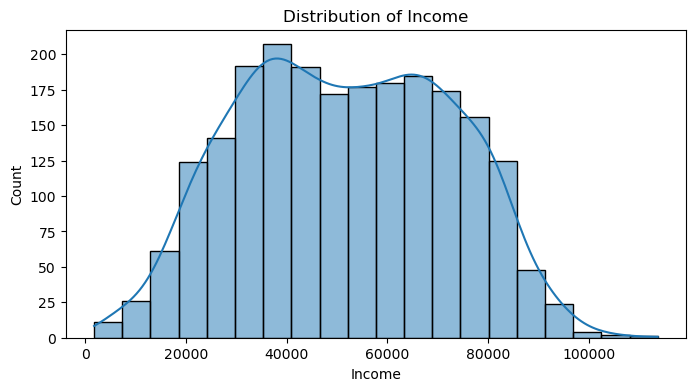

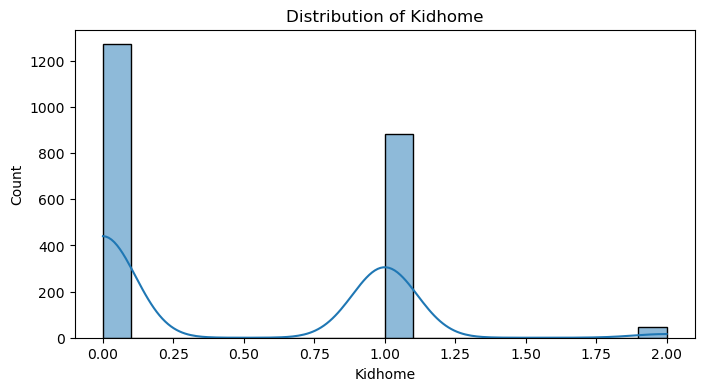

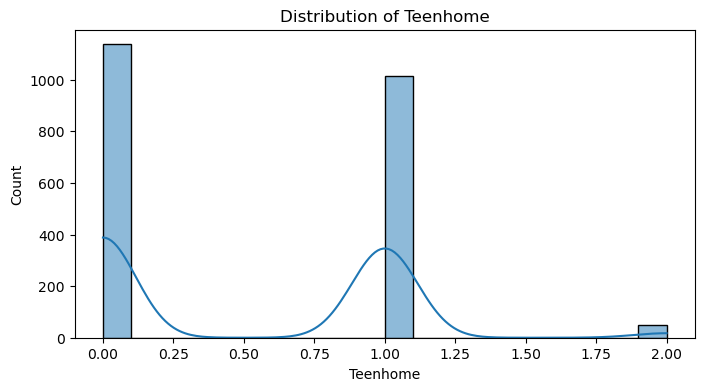

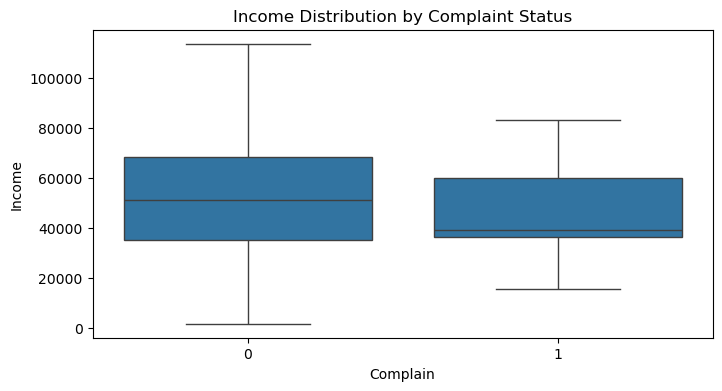

In [24]:
# Histogram for numerical variables in X
for col in ['Income', 'Kidhome', 'Teenhome']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

# Boxplot for Income grouped by Complain
plt.figure(figsize=(8, 4))
sns.boxplot(x='Complain', y='Income', data=df)
plt.title('Income Distribution by Complaint Status')
plt.show()

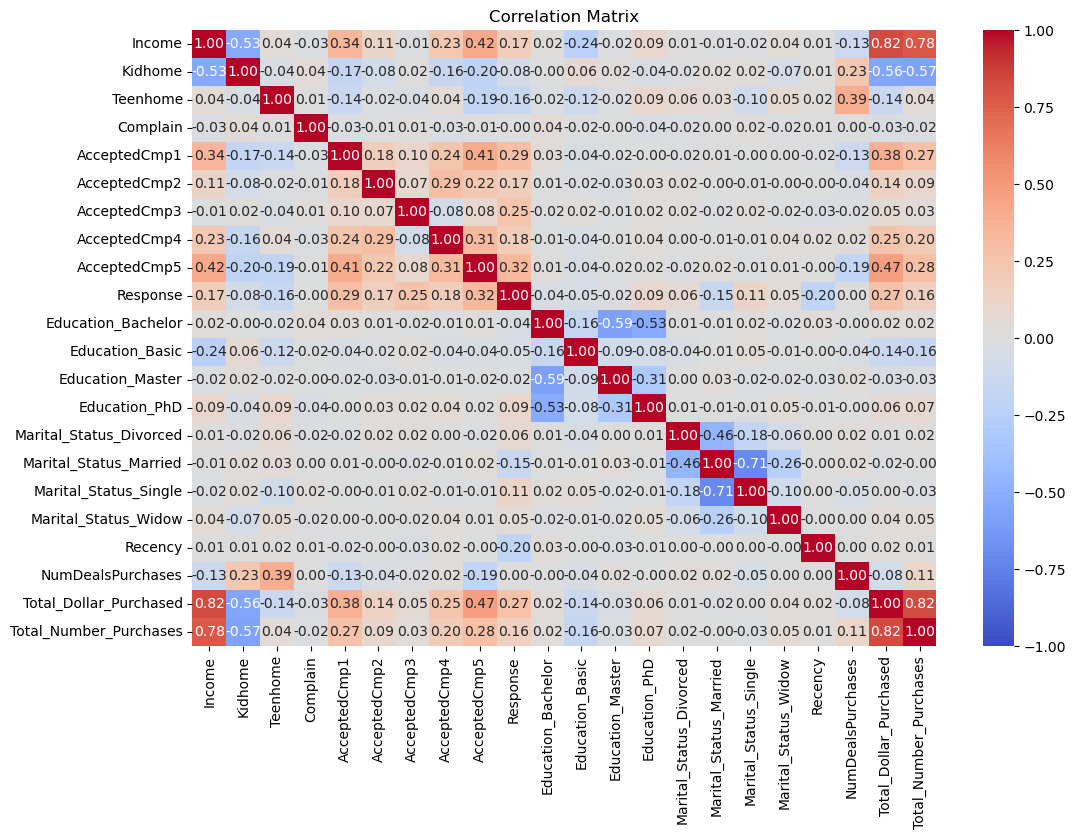

In [25]:
# Compute correlation matrix
corr_matrix = df[x_columns + y_columns].corr()

# Visualize with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

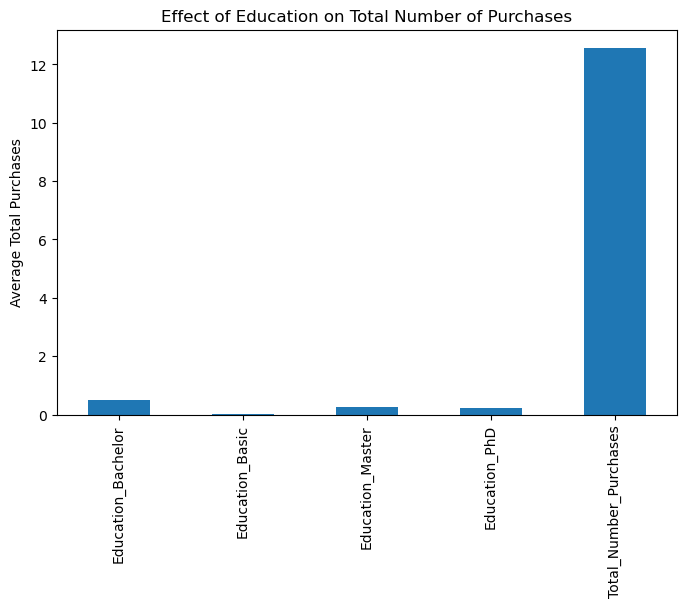

In [26]:
# Aggregate data by Education levels
education_cols = ['Education_Bachelor', 'Education_Basic', 'Education_Master', 'Education_PhD']
education_effect = df[education_cols + ['Total_Number_Purchases']].mean()

# Visualize
education_effect.T.plot(kind='bar', figsize=(8, 5))
plt.title('Effect of Education on Total Number of Purchases')
plt.ylabel('Average Total Purchases')
plt.show()

C:\Users\minsa\AppData\Local\Temp\ipykernel_4608\123867639.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_recency_effect = df.groupby('Income_Bracket')['Recency'].mean()


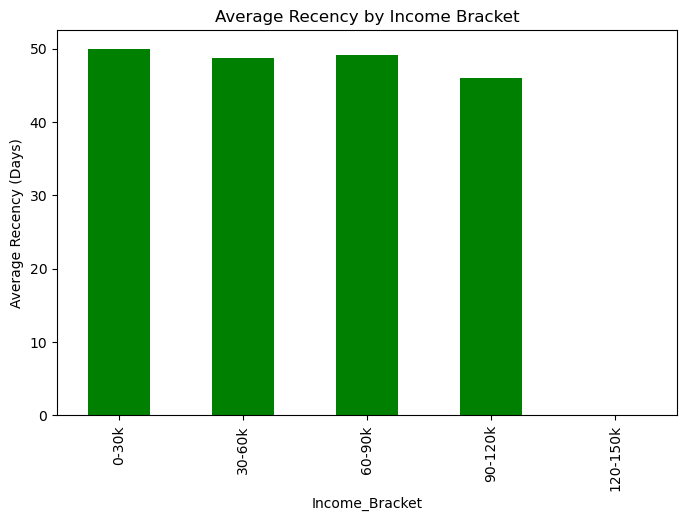

In [27]:
# Grouping by income brackets
df['Income_Bracket'] = pd.cut(df['Income'], bins=[0, 30000, 60000, 90000, 120000, 150000],
                              labels=['0-30k', '30-60k', '60-90k', '90-120k', '120-150k'])
income_recency_effect = df.groupby('Income_Bracket')['Recency'].mean()

# Visualize
income_recency_effect.plot(kind='bar', figsize=(8, 5), color='green')
plt.title('Average Recency by Income Bracket')
plt.ylabel('Average Recency (Days)')
plt.show()

***PREPROCESSING***

In [ ]:
# Dividing the columns into two types: 1. Numerical values & 2. Categorical or Boolean
numerical_all = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntWines',
             'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Total Purchases', 'Since_Years']

non_numerical_all = ['Dt_Customer', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widow']

# numerical_of_intrest = ['Year_Birth','Income', 'Kidhome', 'Teenhome', 'MntWines',
#             'MntFruits', 'MntMeatProducts', 'MntFishProducts',
#       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
#       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
#       'NumWebVisitsMonth', 'Total Purchases','Since_Years']

In [28]:
from sklearn.preprocessing import StandardScaler

# Standardizing demographic variables
demographic_vars = ['Income', 'Kidhome', 'Teenhome']
demographic_data = df[demographic_vars]
demographic_scaled = StandardScaler().fit_transform(demographic_data)

# Standardizing behavioral variables
behavioral_vars = ['Recency', 'NumDealsPurchases', 'Total_Dollar_Purchased', 'Total_Number_Purchases']
behavioral_data = df[behavioral_vars]
behavioral_scaled = StandardScaler().fit_transform(behavioral_data)

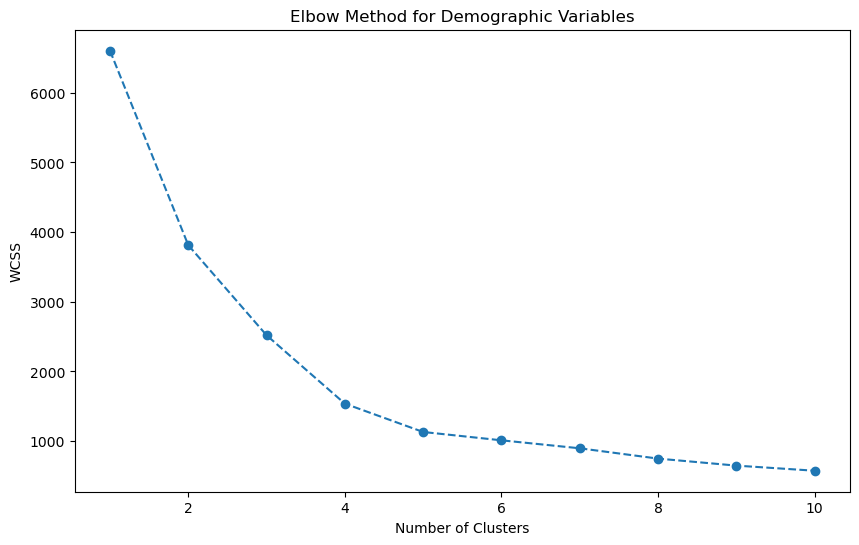

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting only demographic variables
demographic_vars = ['Income', 'Kidhome', 'Teenhome']
X_demo = df[demographic_vars]

# Standardizing the demographic variables
scaler = StandardScaler()
X_demo_scaled = scaler.fit_transform(X_demo)

# Calculating WCSS for different cluster sizes
wcss_demo = []
for i in range(1, 11):  # Testing cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_demo_scaled)
    wcss_demo.append(kmeans.inertia_)

# Plotting the Elbow Method for demographic variables
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_demo, marker='o', linestyle='--')
plt.title('Elbow Method for Demographic Variables')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Optimal number of clusters (k): 4


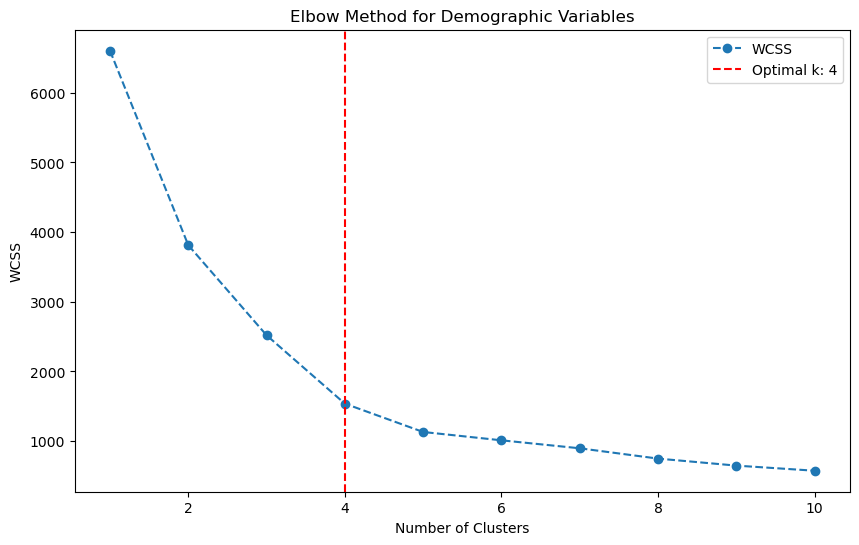

In [30]:
from kneed import KneeLocator

# Find the elbow/knee point
knee_locator = KneeLocator(range(1, 11), wcss_demo, curve='convex', direction='decreasing')

# Optimal number of clusters
optimal_k = knee_locator.knee
print(f"Optimal number of clusters (k): {optimal_k}")

# Plot with the knee point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_demo, marker='o', linestyle='--', label='WCSS')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k: {optimal_k}')
plt.title('Elbow Method for Demographic Variables')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()


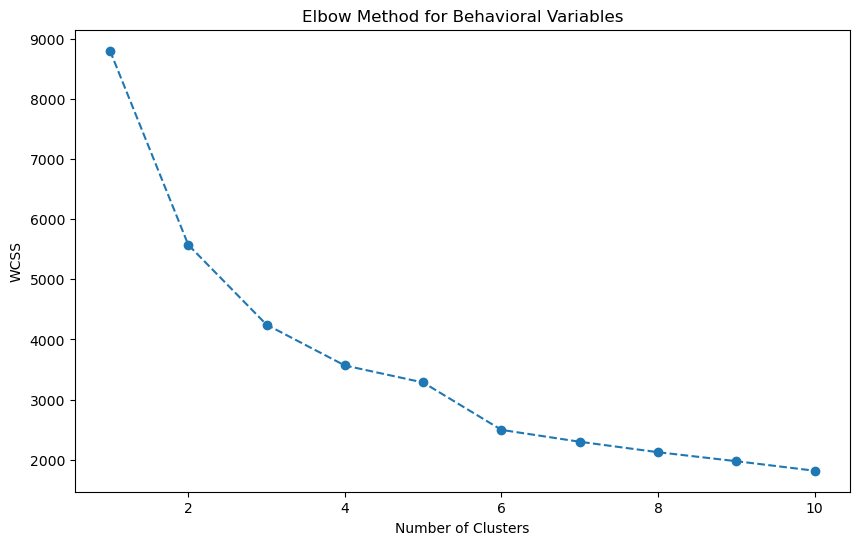

In [31]:
# Selecting only behavioral variables
behavioral_vars = ['Recency', 'NumDealsPurchases', 'Total_Dollar_Purchased', 'Total_Number_Purchases']
X_behavior = df[behavioral_vars]

# Standardizing the behavioral variables
X_behavior_scaled = scaler.fit_transform(X_behavior)  # Reusing the scaler

# Calculating WCSS for different cluster sizes
wcss_behavior = []
for i in range(1, 11):  # Testing cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_behavior_scaled)
    wcss_behavior.append(kmeans.inertia_)

# Plotting the Elbow Method for behavioral variables
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_behavior, marker='o', linestyle='--')
plt.title('Elbow Method for Behavioral Variables')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Optimal number of clusters (k) for behavioral variables: 6


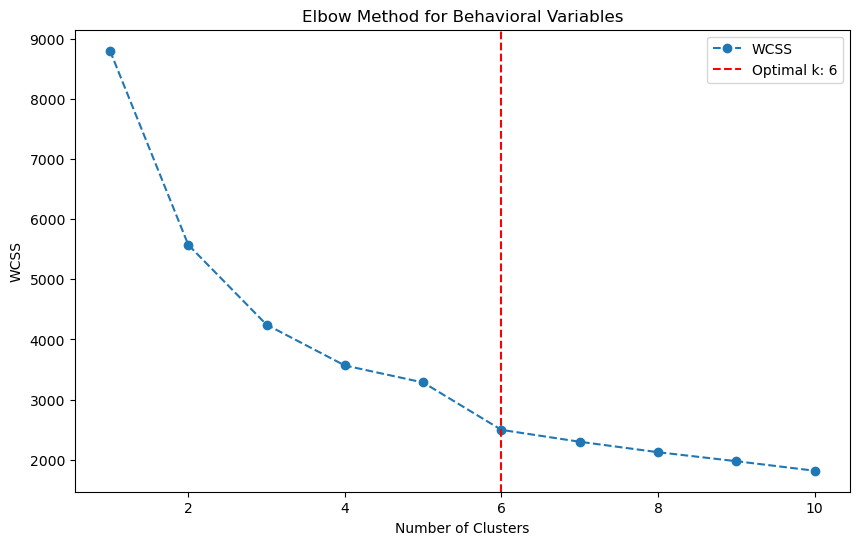

In [ ]:
# Use KneeLocator to find the optimal number of clusters (k)
knee_locator = KneeLocator(range(1, 11), wcss_behavior, curve='convex', direction='decreasing')

# Optimal number of clusters
optimal_k_behavior = knee_locator.knee
print(f"Optimal number of clusters (k) for behavioral variables: {optimal_k_behavior}")

# Plotting the Elbow Method for behavioral variables with the knee point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_behavior, marker='o', linestyle='--', label='WCSS')
plt.axvline(x=optimal_k_behavior, color='red', linestyle='--', label=f'Optimal k: {optimal_k_behavior}')
plt.title('Elbow Method for Behavioral Variables')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()


***Running K-Means***

In [ ]:
# Demographic Clustering
kmeans_demo = KMeans(n_clusters=4, random_state=42)
demo_clusters = kmeans_demo.fit_predict(demographic_scaled)
df['Demo_Cluster'] = demo_clusters

# Behavioral Clustering
kmeans_behavior = KMeans(n_clusters=6, random_state=42)
behavior_clusters = kmeans_behavior.fit_predict(behavioral_scaled)
df['Behavior_Cluster'] = behavior_clusters


In [34]:
df.groupby('Demo_Cluster')[demographic_vars].mean()


,Income,Kidhome,Teenhome
Demo_Cluster,,,
0,74267.459510,0.037665,0.000000
1,44155.331742,1.071599,1.047733
2,57829.173375,0.000000,1.046440
3,30232.021488,0.836364,0.000000


In [35]:
df.groupby('Behavior_Cluster')[behavioral_vars].mean()


,Recency,NumDealsPurchases,Total_Dollar_Purchased,Total_Number_Purchases
Behavior_Cluster,,,,
0,21.910526,1.507895,1248.984211,19.857895
1,75.465887,1.846004,118.842105,6.360624
2,51.171930,5.028070,584.473684,15.221053
3,74.016667,1.516667,1253.933333,19.426190
4,39.934783,9.956522,831.260870,17.543478
5,24.066427,1.885099,121.658887,6.355476


In [36]:
# Get cluster centroids for Demographic clustering
demo_centroids = pd.DataFrame(kmeans_demo.cluster_centers_, columns=demographic_vars)
print("Demographic Clusters Centroids:")
print(demo_centroids)

# Get cluster centroids for Behavioral clustering
behavior_centroids = pd.DataFrame(kmeans_behavior.cluster_centers_, columns=behavioral_vars)
print("Behavioral Clusters Centroids:")
print(behavior_centroids)

Demographic Clusters Centroids:
     Income   Kidhome  Teenhome
0  1.093879 -0.754544 -0.930657
1 -0.359656  1.170249  0.994142
2  0.300390 -0.824661  0.991766
3 -1.031745  0.732330 -0.930657
Behavioral Clusters Centroids:
    Recency  NumDealsPurchases  Total_Dollar_Purchased  Total_Number_Purchases
0 -0.940786          -0.428020                1.066528                1.015071
1  0.913573          -0.249399               -0.810258               -0.863620
2  0.073473           1.438347               -0.036527                0.369942
3  0.861321          -0.424729                1.076915                0.955908
4 -0.315115           4.052365                0.373554                0.693274
5 -0.863853          -0.228664               -0.805577               -0.864337


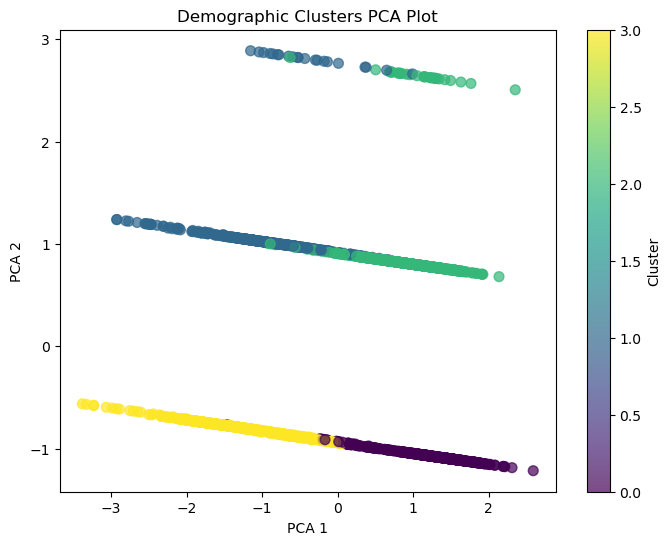

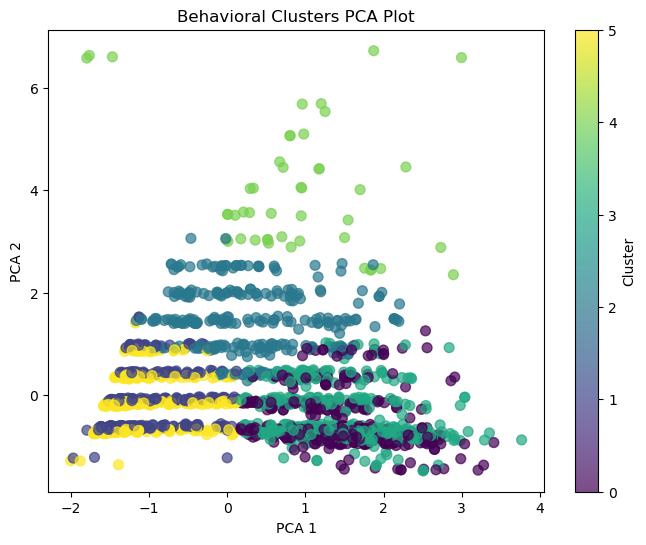

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dimensionality reduction using PCA for Demographic Data
pca_demo = PCA(n_components=2)
demo_pca = pca_demo.fit_transform(demographic_scaled)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(demo_pca[:, 0], demo_pca[:, 1], c=df['Demo_Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Demographic Clusters PCA Plot')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# Dimensionality reduction using PCA for Behavioral Data
pca_behavior = PCA(n_components=2)
behavior_pca = pca_behavior.fit_transform(behavioral_scaled)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(behavior_pca[:, 0], behavior_pca[:, 1], c=df['Behavior_Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Behavioral Clusters PCA Plot')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [38]:
# This table will help you understand if certain demographic groups tend to have similar or different behavior patterns.
# Analyzing the relationship between Demo_Cluster and Behavior_Cluster
pd.crosstab(df['Demo_Cluster'], df['Behavior_Cluster'], margins=True)

Behavior_Cluster,0,1,2,3,4,5,All
Demo_Cluster,,,,,,,
0,237,17,1,254,0,22,531
1,5,136,93,4,34,147,419
2,128,99,149,156,9,105,646
3,10,261,42,6,3,283,605
All,380,513,285,420,46,557,2201


In [39]:
# Analyzing key behavioral metrics by demographic clusters
df.groupby('Demo_Cluster')[['Recency', 'Total_Dollar_Purchased', 'Total_Number_Purchases']].mean()


,Recency,Total_Dollar_Purchased,Total_Number_Purchases
Demo_Cluster,,,
0,49.355932,1322.585687,18.740113
1,49.408115,221.646778,8.085919
2,48.880805,704.492260,15.927245
3,48.704132,139.742149,6.652893


In [40]:
# Analyzing demographic characteristics by behavioral clusters
df.groupby('Behavior_Cluster')[demographic_vars].mean()

,Income,Kidhome,Teenhome
Behavior_Cluster,,,
0,72767.126316,0.068421,0.360526
1,36227.101365,0.721248,0.481481
2,52030.491228,0.487719,0.908772
3,71783.609524,0.042857,0.400000
4,52701.260870,0.760870,1.000000
5,35811.578097,0.694794,0.463196


In [41]:
# Exploring demographics for each cluster
demo_analysis = df.groupby('Demo_Cluster')[demographic_vars].mean()
print(demo_analysis)


                    Income   Kidhome  Teenhome
Demo_Cluster                                  
0             74267.459510  0.037665  0.000000
1             44155.331742  1.071599  1.047733
2             57829.173375  0.000000  1.046440
3             30232.021488  0.836364  0.000000


***Interpretation of Demographic Variables***

0. Cluster 0 is composed of higher-income individuals without children or with very young children.
1. Cluster 1 represents middle-income families with children, including teenagers.
2. Cluster 2 consists of middle-income families with teenagers but no younger children.
3. Cluster 3 represents lower-income individuals with young children but no teenagers.

***Summary of Demographic Insights:***
- Cluster 0: Higher-income customers with no children or very young children.
- Cluster 1: Middle-income families with children, including teenagers.
- Cluster 2: Middle-income families with teenagers but no younger children.
- Cluster 3: Lower-income individuals with young children but no teenagers.

***Potential Next Steps:***
- Cluster 0: Could be targeted with premium products or exclusive offers due to their higher income and potentially no young children to care for.
- Cluster 1: Might be interested in family-oriented products, deals for parents, or discounts for families with children.
- Cluster 2: Could be approached with teen-focused promotions or products for parents of teenagers.
- Cluster 3: May benefit from budget-friendly offers or promotions for families with young children.

In [42]:
# Exploring behavioral patterns for each cluster
behavior_analysis = df.groupby('Behavior_Cluster')[behavioral_vars].mean()
print(behavior_analysis)

                    Recency  NumDealsPurchases  Total_Dollar_Purchased  \
Behavior_Cluster                                                         
0                 21.910526           1.507895             1248.984211   
1                 75.465887           1.846004              118.842105   
2                 51.171930           5.028070              584.473684   
3                 74.016667           1.516667             1253.933333   
4                 39.934783           9.956522              831.260870   
5                 24.066427           1.885099              121.658887   

                  Total_Number_Purchases  
Behavior_Cluster                          
0                              19.857895  
1                               6.360624  
2                              15.221053  
3                              19.426190  
4                              17.543478  
5                               6.355476  


**Interpretation of behavior clusters:**

0.  Cluster 0 consists of frequent, high-value customers who have recently engaged with the brand, tend to buy many products, and have spent a considerable amount.

1.  Cluster 1 represents low-engagement customers who aren't recent but show some interest in deals and discounts. They are price-sensitive but don't buy often.

2.  Cluster 2 appears to be deal-seeking customers who actively take advantage of promotions but tend to make moderate purchases. They are somewhat engaged but not as high-spending as Cluster 0.

3. Cluster 3 represents previously high-value, frequent customers who have recently become less active. They may have been core customers in the past.

4. Cluster 4 consists of deal-driven, frequent buyers who engage heavily with discounts and promotions. They spend moderately and make many purchases.

5. Cluster 5 is characterized by moderately recent, low-value customers who are not as frequent buyers and tend to spend less overall, but still show interest in deals.

***Summary of Clusters:***

- Cluster 0: High-value, recent, frequent shoppers, with moderate deal purchases.

- Cluster 1: Inactive, low-value customers, who make fewer purchases but are still deal-driven.

- Cluster 2: Deal-seeking, moderately recent, active buyers with a moderate total spend.
 
- Cluster 3: Previously active and high-spending customers who have become less engaged.

- Cluster 4: Deal-driven, frequent buyers with moderate engagement and spending.

- Cluster 5: Recent but low-engagement customers with fewer and lower-value purchases.


These insights can guide targeted marketing strategies, such as:

- Cluster 0: Reward with loyalty programs to maintain engagement.

- Cluster 1 and 5: Re-engage with personalized offers and promotions to boost activity.

- Cluster 2 and 4: Introduce more promotions to encourage repeat purchases.

- Cluster 3: Re-target inactive high spenders with tailored incentives to bring them back.

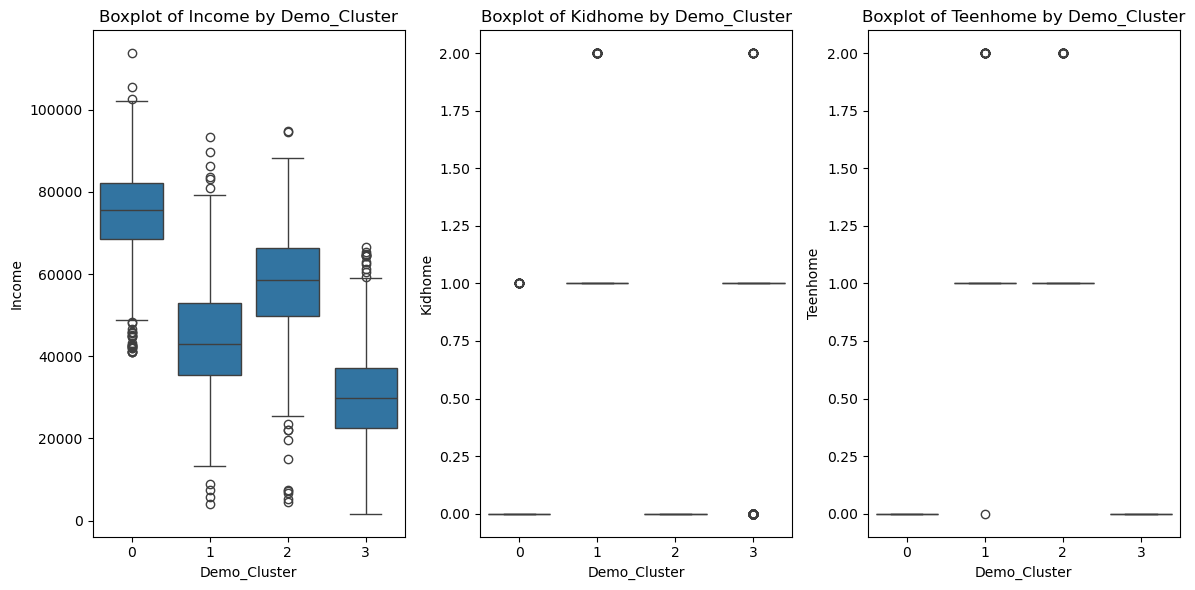

In [ ]:
# Boxplot for Demographic Variables by Demo_Cluster
plt.figure(figsize=(12, 6))
for i, var in enumerate(demographic_vars, 1):
    plt.subplot(1, len(demographic_vars), i)
    sns.boxplot(x='Demo_Cluster', y=var, data=df)
    plt.title(f'Boxplot of {var} by Demo_Cluster')
plt.tight_layout()
plt.show()

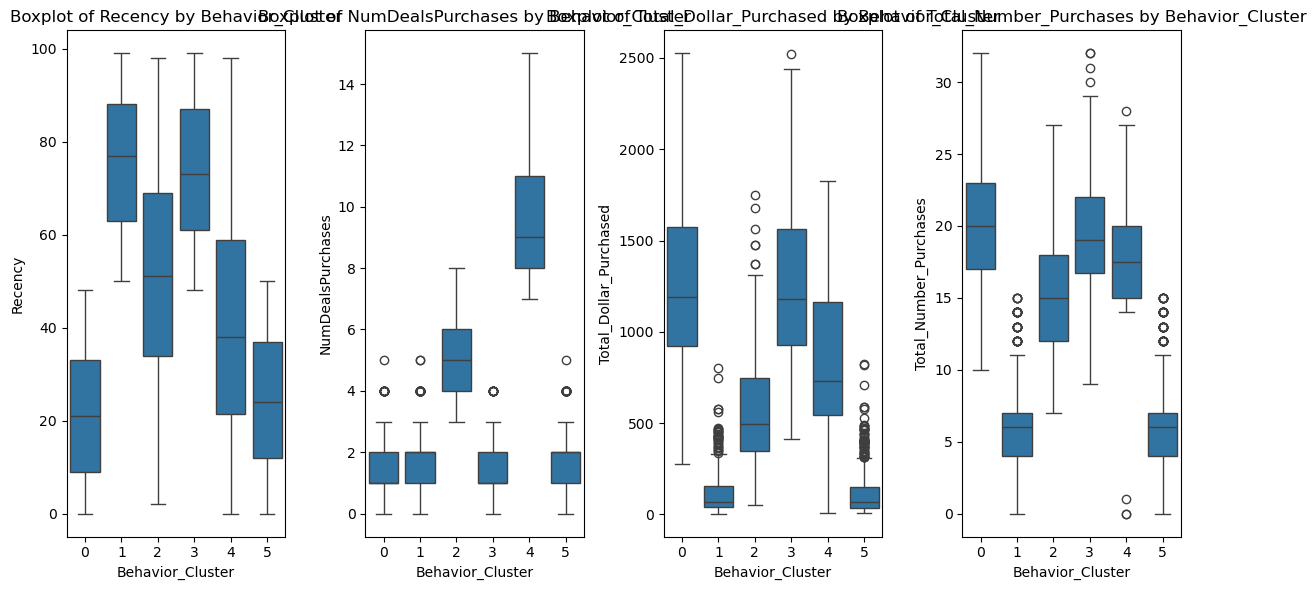

In [44]:
# Boxplot for Behavioral Variables by Behavior_Cluster
plt.figure(figsize=(12, 6))
for i, var in enumerate(behavioral_vars, 1):
    plt.subplot(1, len(behavioral_vars), i)
    sns.boxplot(x='Behavior_Cluster', y=var, data=df)
    plt.title(f'Boxplot of {var} by Behavior_Cluster')
plt.tight_layout()
plt.show()

***Plotting behavior cluster and demographic cluster before PCA***

<Axes: xlabel='Income', ylabel='Total_Dollar_Purchased'>

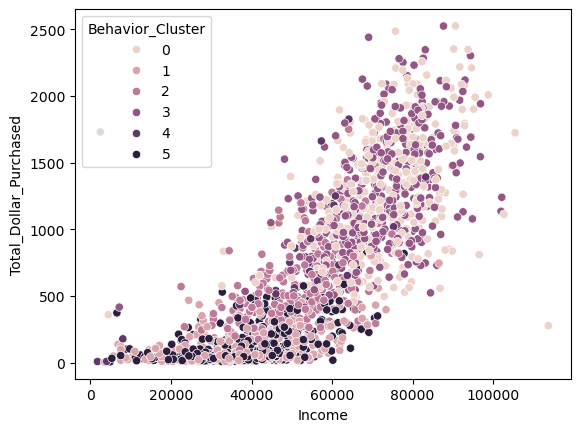

In [ ]:
sns.scatterplot(data=df, x='Income', y='Total_Dollar_Purchased', hue='Behavior_Cluster')


<Axes: xlabel='Income', ylabel='Total_Dollar_Purchased'>

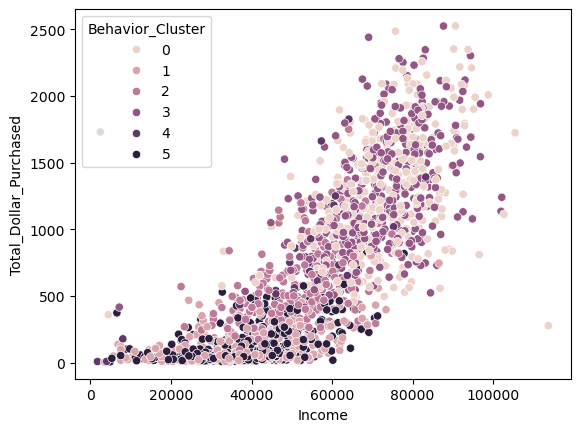

In [46]:
sns.scatterplot(data=df, x='Income', y='Total_Dollar_Purchased', hue='Behavior_Cluster')

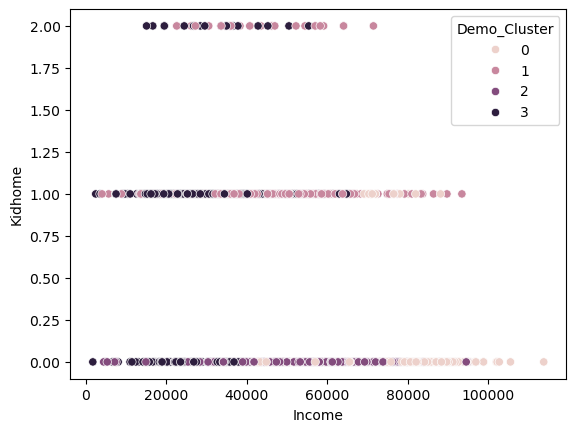

In [ ]:
sns.scatterplot(data=df, x='Income', y='Kidhome', hue='Demo_Cluster')
plt.show()
